Importing packages

In [7]:
import nltk
import matplotlib
import re
import gensim
import csv
import re
import nltk
import nltk.tokenize
nltk.download('punkt', quiet=True)

True

# Building a corpus with reddit
For scraping our reddit data i have used PRAW

In [2]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


creating a corpus with subredditname.txt from a particular subreddit.

In [3]:
ci = "vDe3LCe2FfUK7P_Z2Kr2_Q" #your client id
cs = "18S93tUkP4xQbWMFBAtTpgzvgA6a5A" #your client secret
ua = "tha" #your user agent name
sub = "MensRights" #the name of the subreddit (not including the 'r/')

subredditname.txt file containing post titles, content and top level comments.

In [4]:
import praw
from praw.models import MoreComments

reddit = praw.Reddit(
    client_id=ci,
    client_secret=cs,
    user_agent=ua
)

with open(sub+".txt", "w") as f:
    
    #on the following line you can change top to any of the previously mentioned ways of sorting 
    #and the limit to however many posts you would like to extract (here we extract just 10).
    for post in reddit.subreddit(sub).top(limit=10): 
        
        #this line collects the post titles
        f.write(post.title+"\n")
        
        #this line collects the post content
        f.write(post.selftext+"\n")
        
        #this section collects the comments
        for comment in post.comments:
            if isinstance(comment, MoreComments):
                continue
            f.write(comment.body+"\n")

Loading the .txt file

In [8]:
with open('MensRights.txt') as text:
     lines = text.readlines()
print(lines[:10])


['How to get banned from r/Feminism\n', '\n', "This kind of post is normally removed as it violates our subreddit policies. However, I have been travelling and didn't see it. At this point, with the number of participants and comments, removing it would also have a detrimental effect to that valuable discussion. As a result, I will be leaving this up.\n", '\n', "Those who continue to report it won't be satisfied with the response.\n", 'It looks like they are behind on banning people. Usually [this](http://imgur.com/MAqsCnN) is enough.\n', '"Feeling safe" is how we ended up with the TSA and their useless security theatre. \n', '[deleted]\n', "Female 50 here, I tend to agree that ensuring people are safe is more important than trying to make them feel safe.  I think being safe is a generic male and female, adult and child, issue but what makes someone feel safe is an individual issue.  I don't think we can guarantee anyone's safety but we should strive to create a society where everyone 

In [9]:
for l in lines[:10]:
    print (l)

How to get banned from r/Feminism



This kind of post is normally removed as it violates our subreddit policies. However, I have been travelling and didn't see it. At this point, with the number of participants and comments, removing it would also have a detrimental effect to that valuable discussion. As a result, I will be leaving this up.



Those who continue to report it won't be satisfied with the response.

It looks like they are behind on banning people. Usually [this](http://imgur.com/MAqsCnN) is enough.

"Feeling safe" is how we ended up with the TSA and their useless security theatre. 

[deleted]

Female 50 here, I tend to agree that ensuring people are safe is more important than trying to make them feel safe.  I think being safe is a generic male and female, adult and child, issue but what makes someone feel safe is an individual issue.  I don't think we can guarantee anyone's safety but we should strive to create a society where everyone is valued and in that valuation pe

recognize punctuation

In [10]:
PUNCT_RE = re.compile(r'[^\w\s]+$')
def is_punct(string):
    return PUNCT_RE.match(string) is not None

tokenization

In [11]:
import nltk
import nltk.tokenize
nltk.download('punkt', quiet=True)

for l in lines[:4]:
    tokens = nltk.tokenize.word_tokenize(l)
    tokens_processed = [token for token in tokens if not is_punct(token)]
    print(tokens_processed)
    

['How', 'to', 'get', 'banned', 'from', 'r/Feminism']
[]
['This', 'kind', 'of', 'post', 'is', 'normally', 'removed', 'as', 'it', 'violates', 'our', 'subreddit', 'policies', 'However', 'I', 'have', 'been', 'travelling', 'and', 'did', "n't", 'see', 'it', 'At', 'this', 'point', 'with', 'the', 'number', 'of', 'participants', 'and', 'comments', 'removing', 'it', 'would', 'also', 'have', 'a', 'detrimental', 'effect', 'to', 'that', 'valuable', 'discussion', 'As', 'a', 'result', 'I', 'will', 'be', 'leaving', 'this', 'up']
[]


processing tokens

In [12]:
for l in lines[:1]:
    tokens = nltk.tokenize.word_tokenize(l)
    print(tokens)
    
    tokens_processed = [token for token in tokens if not is_punct(token)]
    print(tokens_processed)
    

['How', 'to', 'get', 'banned', 'from', 'r/Feminism']
['How', 'to', 'get', 'banned', 'from', 'r/Feminism']


In [13]:
data = []
for l in lines[:2000]:
    tokens = nltk.tokenize.word_tokenize(l)
    tokens_processed = [token for token in tokens if not is_punct(token)]
    print(tokens_processed)
    data.append(tokens_processed)
    
print(data)

['How', 'to', 'get', 'banned', 'from', 'r/Feminism']
[]
['This', 'kind', 'of', 'post', 'is', 'normally', 'removed', 'as', 'it', 'violates', 'our', 'subreddit', 'policies', 'However', 'I', 'have', 'been', 'travelling', 'and', 'did', "n't", 'see', 'it', 'At', 'this', 'point', 'with', 'the', 'number', 'of', 'participants', 'and', 'comments', 'removing', 'it', 'would', 'also', 'have', 'a', 'detrimental', 'effect', 'to', 'that', 'valuable', 'discussion', 'As', 'a', 'result', 'I', 'will', 'be', 'leaving', 'this', 'up']
[]
['Those', 'who', 'continue', 'to', 'report', 'it', 'wo', "n't", 'be', 'satisfied', 'with', 'the', 'response']
['It', 'looks', 'like', 'they', 'are', 'behind', 'on', 'banning', 'people', 'Usually', 'this', 'http', '//imgur.com/MAqsCnN', 'is', 'enough']
['Feeling', 'safe', 'is', 'how', 'we', 'ended', 'up', 'with', 'the', 'TSA', 'and', 'their', 'useless', 'security', 'theatre']
['deleted']
['Female', '50', 'here', 'I', 'tend', 'to', 'agree', 'that', 'ensuring', 'people', 'are'

['As', 'a', 'feminist', 'and', 'as', 'a', 'woman', 'I', 'support', 'this', 'Signed']
['Thinking', 'of', 'boycotting', 'the', 'Fantastic', 'Beasts', 'movies', 'now']
['They', 'had', 'an', 'Arab', 'women', 'who', 'called', 'servants', 'slaves', 'and', 'was', 'against', 'laws', 'to', 'protect', 'them']
[]
['LOreal', 'is', 'hell', 'stupid', 'and', 'they', 'don', 't', 'care']
['Where', 'do', 'I', 'sign']
['I', "'m", 'OOTL', 'here', 'Can', 'someone', 'fill', 'me', 'in', 'What', "'s", 'going', 'on']
['I', 'stop', 'buying', 'their', 'make', 'up', 'because', 'of', 'her']
['Isn', 't', 'Change.org', 'aUS', 'based', 'for', 'profit', 'company', 'And', 'isnt', 'L', 'Oreal', 'a', 'French', 'company']
['Just', 'saying']
['Signed', 'She', 'needs', 'to', 'be', 'punished', 'She', 'does', "n't", 'deserve', 'to', 'represent', 'any', 'brand']
['Nice', 'It', 's', 'over', '500,000', 'now']
['They', 'locked', 'the', 'voting', 'on', 'this', 'post', 'because', 'it', 'got', 'so', 'many', 'upvotes']
['Doubt', 'it'

['niceee']
['Hot', 'damn', 'I', 'wish', 'she', 'would', 'have', 'raped', 'me', 'when', 'I', 'was', 'that', 'age']
['Nice']
['This', 'case', 'was', 'posted', 'to', 'morbidreality', 'and', 'every', 'other', 'comment', 'was', 'defending', 'that', 'the', 'kid', 'was', 'biologically', 'ready', 'and', 'was', "n't", 'traumatized', 'by', 'this', 'Check', 'my', 'post', 'history', 'if', 'you', "'re", 'a', 'masochist', 'It', "'s", 'truly', 'truly', 'disgusting']
['This', 'shit', 'makes', 'me', 'mad']
['She', 'was', 'jailed', 'end', 'of', 'it', 'Are', 'you', 'guys', 'outraged', 'because', 'of', 'some', 'stupid', 'random', 'clickbait', 'article']
[]
['Welcome', 'to', 'the', 'internet', 'I', 'guess']
['listen', 'this', 'is', '100', 'wrong', 'and', 'people', 'like', 'this', 'need', 'to', 'rot', 'in', 'jail']
[]
['but', 'where', 'the', 'fk', 'were', 'all', 'these', 'teachers', 'when', 'I', 'was', '13']
['Why', 'is', 'it', 'rape', 'if', 'he', 'wanted', 'to', 'have', 'sex', 'with', 'her']
['Girls', 'if'

['6^b^HFbIR', 'K9StsL', '0dMR0P', 'L1', 'Fod~']
['I', 'thought', 'her', 'comment', 'was', 'pretty', 'funny', 'to', 'be', 'honest', 'and', 'then', 'he', 'followed', 'it', 'up', 'with', 'a', 'similarly', 'amusing', 'comment', 'of', 'his', 'own', 'what', "'s", 'the', 'problem']
['Some', 'women', 'are', 'stupid', 'bitches', 'therefore', 'all', 'men', 'are', 'oppressed', 'jesus', 'you', 'guys', 'are', 'so', 'desperate', 'haha']
['deleted']
['This', 'is', 'why', 'we', 'do', "n't", 'take', 'your', 'sub', 'seriously']
['When', 'you', 'see', 'a', 'man', 'in', 'the', 'street', 'he', 'basically', 'looks', 'like', 'that', 'when', 'he', 'rolls', 'out', 'of', 'bed', 'women', 'on', 'the', 'other', 'hand']
['Maybe', 'put', 'a', 'humor', 'tag', 'on', 'this', 'crap']
['I', 'like', 'how', 'his', 'top', 'lady', 'is', 'still', 'Angelina', 'Found', 'a', '90s', 'baby']
['Is', 'this', 'all', 'the', 'sub', 'is', 'about', 'now', 'People', 'coming', 'in', 'to', 'incessantly', 'concern', 'troll', 'about', 'what',

# importing the word2vec model

In [47]:

model = gensim.models.Word2Vec(data, min_count=1)
model.save('sample_model.bin')
sample_model = gensim.models.Word2Vec.load('sample_model.bin')

similar words using word2vec model

In [48]:
sample_model.wv.most_similar("good")

[('my', 0.9993242621421814),
 ('a', 0.9993107318878174),
 ('the', 0.9993091225624084),
 ('people', 0.9993074536323547),
 ('me', 0.999279260635376),
 ('this', 0.9992749094963074),
 ('and', 0.9992735385894775),
 ('of', 0.9992732405662537),
 ('at', 0.9992721676826477),
 ('to', 0.9992671608924866)]

In [49]:
sample_model.wv.most_similar("offensive")

[('must', 0.9182849526405334),
 ('females', 0.9133128523826599),
 ('jail', 0.9131869077682495),
 ('argument', 0.9126542210578918),
 ('Even', 0.9112392663955688),
 ('become', 0.9111906886100769),
 ('big', 0.911136269569397),
 ('bad', 0.9108468294143677),
 ('able', 0.9107464551925659),
 ('God', 0.9106439352035522)]

creating review model to analyse using tensorflow projections

In [50]:
review_model = gensim.models.Word2Vec(data, min_count=1)

In [80]:
review_model.wv.most_similar('safety')

[('extremely', 0.9718686938285828),
 ('once', 0.9709929823875427),
 ('tell', 0.9708358645439148),
 ('http', 0.9708064794540405),
 ('blame', 0.9707106351852417),
 ('statutory', 0.9706955552101135),
 ('fucking', 0.9704445600509644),
 ('Judge', 0.9702651500701904),
 ('such', 0.9702287912368774),
 ('support', 0.9701884984970093)]

this is how word is represented in the array

In [52]:
review_model.wv['good']

array([-0.11980865,  0.21018396,  0.07680493,  0.01295687,  0.09514204,
       -0.3584966 ,  0.10956541,  0.39356855, -0.20824996, -0.23587431,
       -0.07834762, -0.31775755, -0.01525096,  0.06163571,  0.10510712,
       -0.06951592,  0.0551879 , -0.19979513, -0.03008512, -0.41262984,
        0.10482852,  0.05329382,  0.12976551, -0.01640629, -0.12122294,
        0.0681294 , -0.12551354, -0.08235587, -0.13938558,  0.05271523,
        0.21331048, -0.00613451,  0.09339262, -0.18347801, -0.10807928,
        0.14690425,  0.08485638, -0.11220217, -0.1129134 , -0.28357652,
        0.05761386, -0.15081333, -0.12826443, -0.00381938,  0.25459146,
       -0.08143395, -0.02222069, -0.10313003,  0.16376303,  0.11468307,
        0.10126428, -0.16257824, -0.0039206 ,  0.01031596, -0.1336054 ,
        0.10181294,  0.08432212, -0.00926063, -0.22427115,  0.11785369,
        0.07598187,  0.05258835,  0.01761926,  0.00597301, -0.1963529 ,
        0.20663226,  0.04995693,  0.15738995, -0.28672248,  0.29

finding the similarity of offensive words

In [82]:
offensive = ['fuck', 'sex', 'rape', 'abuse','ass', 'disgusting', 'senseless', 'brutal', 'slut']


for d in offensive:
    print( d, review_model.wv.similarity('offensive', d))



fuck 0.90983325
sex 0.9089702
rape 0.90840924
abuse 0.911058
ass 0.8710925
disgusting 0.9001309
senseless 0.8244694
brutal 0.5861086
slut 0.8702448


converting the file to .bin to use export to metadata and tensor data 

In [83]:
review_model2 = gensim.models.Word2Vec(data, min_count=1)

review_model2.wv.save_word2vec_format('review_model2.bin')

The code for exporting the metadata and tensor data for projections:
python -m gensim.scripts.word2vec2tensor -i /Users/mithunprithvi/Downloads/AI/review_model2.bin -o /Users/mithunprithvi/Downloads/AI/

Building a language model

Training the model using the nltk n-gram pipeline and here 3 means 3- "n-grams"


In [61]:
import string
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
train, vocab = padded_everygram_pipeline(3, data)

Using maximum likelihood estimator in language model

In [62]:
lm = MLE(3)

 Fit the model to generate the vocabulary 

In [63]:
lm.fit(train, vocab)
print(lm.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 4708 items>


In [64]:
lm.vocab.lookup(data[5])

('It',
 'looks',
 'like',
 'they',
 'are',
 'behind',
 'on',
 'banning',
 'people',
 'Usually',
 'this',
 'http',
 '//imgur.com/MAqsCnN',
 'is',
 'enough')

Check which words are in the vocabulary - <UNK> means unknown

In [65]:
lm.vocab.lookup(["follow", "satisfied", "banned", "recovered"])

('follow', 'satisfied', 'banned', '<UNK>')

Shows the number and order of n-grams

In [66]:
print(lm.counts)

<NgramCounter with 3 ngram orders and 106368 ngrams>


Displays the count of a specific word

In [87]:
lm.counts['fuck']

24

In [88]:
lm.counts['shit']

53

In [89]:
lm.counts['rape']

14

# generating sentences using the model

In [71]:
lm.generate(5)

['I', 'bet', 'she', "'d", 'trashed']

In [72]:
lm.generate(7, text_seed=['can'])

['cause', 'direct', 'bodily', 'harm', 'to', 'others', 'People']

In [73]:
lm.generate(5, text_seed=['how'])

['this', 'gif', 'kind', 'of', 'material']

to find the frequency distribution plot, 
loading the file and processing again with different variable since the previous data is list

In [57]:
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())
a = load_txt('MensRights.txt')
a_tokens = nltk.word_tokenize(a)
a_no_punct = [t for t in a_tokens if t.isalnum()]
from nltk.corpus import stopwords
a_no_stop = [t for t in a_no_punct if t not in stopwords.words('english')]
tokens_filtered = [t for t in a_no_stop if t not in stopwords.words('english')]
porter = nltk.PorterStemmer()
tokens_stemmed = [porter.stem(w) for w in a_no_stop]
fd = nltk.FreqDist(tokens_stemmed)
print(fd.most_common(30))

[('i', 824), ('women', 221), ('men', 173), ('like', 164), ('peopl', 124), ('get', 123), ('it', 120), ('feel', 98), ('would', 94), ('right', 93), ('think', 90), ('one', 90), ('the', 90), ('thi', 89), ('fuck', 86), ('make', 84), ('see', 78), ('she', 78), ('woman', 72), ('know', 70), ('even', 66), ('realli', 64), ('wear', 63), ('look', 61), ('thing', 61), ('say', 60), ('want', 59), ('go', 58), ('never', 58), ('shit', 57)]


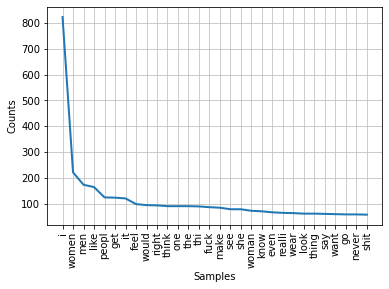

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
fd.plot(30)